In [10]:
%matplotlib inline

In [11]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [12]:
#做一些假資料

nsample=100
x=np.linspace(0,10,100)
X=np.column_stack((x,x**2))
beta=np.array([1,0.1,10])
e=np.random.normal(size=nsample)

In [15]:
print("beta shape:",beta.shape)
print("X shape:",X.shape)

beta shape: (3,)
X shape: (100, 2)


In [21]:
#做截距

#array([1.        , 0.1010101 , 0.01020304])
X=sm.add_constant(X)

#內積
y=np.dot(X,beta)+e

In [23]:
print('y shape:',y.shape)
print('y[1]',y[1])

y shape: (100,)
y[1] 2.7096266735575334


In [7]:
#擬合
model1=sm.OLS(y,X)
res=model1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Thu, 06 Jun 2019   Prob (F-statistic):          2.83e-239
Time:                        13:53:44   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

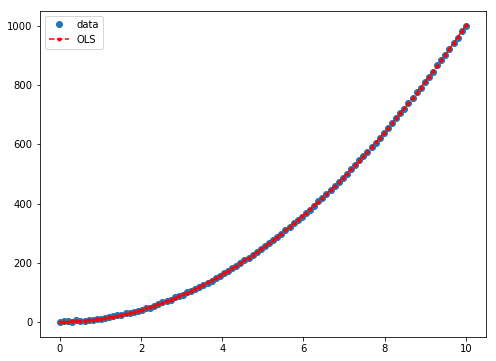

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

In [14]:
#方程是為: y=1.34233516-0.04024948x1+10.01025357x2
#DW:一般來說2是OK的，同時也要搭配看p-value，最好<0.05　
#JB統計量用來檢驗序列觀測值是否服從常態分布，一般來說，JB值越大的情況下，自變數則越不是服從常態分布
#偏態skew用來描述分配狀態是偏離平均數的程度
#峰度(Kurtosis)用來描述分配狀態與常態分配來比較是較為高峻或平坦

#偏態值 > 0，為正偏態，分配集中在平均數以下，低分群的個體較多 (右偏態)
#偏態值 = 0，為平均數左右對稱的分配，平均數上下的個體數相等 (常態)
#偏態值 < 0，為負偏態，分配集中在平均數以上，高分群的個體較多 (左偏態)
#峰度值 > 0，為高狹峰，較常態分配來得高瘦 (資料集中於期望值)
#峰度值 = 0，為常態峰
#峰度值 < 0，為低闊峰，較常態分配來得低寬 (資料分布較廣)

print('Parameters:', result.params)
print('R2:',result.rsquared)

Parameters: [ 1.34233516 -0.04024948 10.01025357]
R2: 0.9999879365025871


In [25]:
#做一些假資料
#x與y之間的關係是非線性的

nsample=50
sig=0.5
x=np.linspace(0,20,nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta=[0.5,0.5,-0.02,5]

#y_true與X具有線性關係
y_true=np.dot(X,beta)

#y與X為非線性關係
y=y_true+sig*np.random.normal(size=nsample)

In [26]:
print('X shape:',X.shape)
print('y shape:',y.shape)
print('X[1]:',X[1])
print('y_true:',y_true[1])
print('y[1]:',y[1])

X shape: (50, 4)
y shape: (50,)
X[1]: [ 0.40816327  0.39692415 21.0849646   1.        ]
y_true: 4.98084441515384
y[1]: 5.342317841793578


In [27]:
res=sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           6.30e-27
Time:                        18:42:24   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [118]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.52038144  0.44954337 -0.02244153  4.88705829]
Standard errors:  [0.02580815 0.10145486 0.00226597 0.16734101]
Predicted values:  [ 4.32602007  4.80471466  5.24661555  5.62722302  5.93087918  6.15334051
  6.30247503  6.39696965  6.46325996  6.53118691  6.62909402  6.77917068
  6.99380643  7.27355542  7.60704537  7.97284601  8.34298997  8.6875678
  8.97964196  9.19967261  9.33872793  9.39995161  9.39804635  9.35685823
  9.30545888  9.27336909  9.28570864  9.35906916  9.49878823  9.69807235
  9.93911316 10.19601327 10.43904115 10.63951592 10.77451952 10.83066214
 10.80628205 10.71171869 10.56761389 10.40152048 10.24337544 10.12058134
 10.05350419 10.05212733 10.11441123 10.22662854 10.36561951 10.502597
 10.6078762  10.6557517 ]


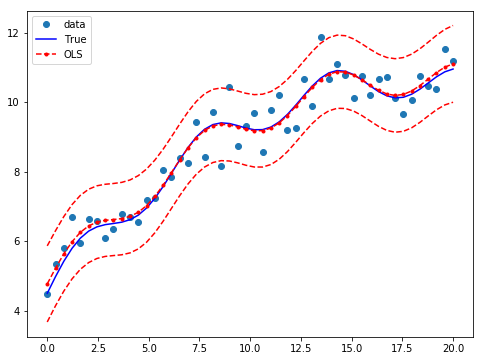

In [28]:
#wls_prediction_std會自動計算res的信賴區間
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [29]:
#dummy variable

nsample=50

#產生50個0的資料
groups=np.zeros(nsample,int)

#第20~40為1
groups[20:40]=1

#40之後為2
groups[40:]=2

dummy=sm.categorical(groups,drop=True)
x=np.linspace(0,20,nsample)
X=np.column_stack((x,dummy[:,1:]))

#讓constant放在最後面
X=sm.add_constant(X,prepend=False)

print("X[0]:",X[0])
print("X[1]:",X[1])
print("X的大小:",X.shape)

beta=[1.,3,-3,10]
y_true=np.dot(X,beta)
e=np.random.normal(size=nsample)
y=y_true+e

X[0]: [0. 0. 0. 1.]
X[1]: [0.40816327 0.         0.         1.        ]
X的大小: (50, 4)


In [30]:
print("groups的樣子:",groups)
print("前20個dummy的樣子:",dummy[0:21])
print("前5個dummy的樣子，由第一個值開始看",dummy[:5,1:])

groups的樣子: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
前20個dummy的樣子: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
前5個dummy的樣子，由第一個值開始看 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [31]:
#fit

res2=sm.OLS(y,X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           5.69e-38
Time:                        18:54:08   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

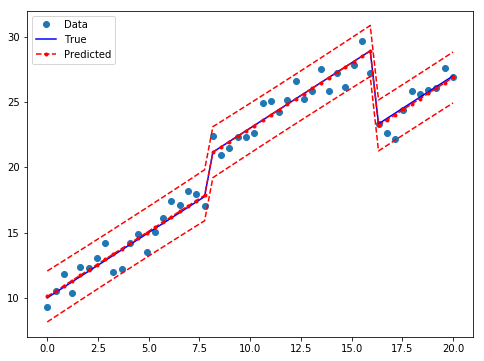

In [32]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [27]:
#假設檢定
#F檢定(聯合假設檢驗: joint hypotheses test)，變異數比率檢驗
#是一種null hypothesis假設，統計值是否服從F分配，通常用來檢驗模型參數，以判斷模型中的參數是否適合用來估計母體

#我們想檢定這些dummy variable之模型參數(coefficients)是否服從F分配
#做法就是將R×β=0
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[145.49268198]]), p=1.2834419617292098e-20, df_denom=46, df_num=2>


In [28]:
#這樣寫也可以
#F檢定告訴我們拒絕h0，接受h1，表示服從F分配，
#p=1.2834419617291678e-20 < 0.05，
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[145.49268198]]), p=1.2834419617291678e-20, df_denom=46, df_num=2>


In [156]:
#原本是beta=[1.,3,-3,10]
#我們如果調整beta讓它小一點
beta = [1., 0.3, -0.0, 10]

y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)
res3 = sm.OLS(y, X).fit()

In [30]:
#我們發現p>0.05，於是無法拒絕h0
#這表示判斷模型中的參數不適合用來估計母體 
print(res3.f_test(R))

<F test: F=array([[1.22491119]]), p=0.30318644106320874, df_denom=46, df_num=2>


In [31]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[1.22491119]]), p=0.30318644106320874, df_denom=46, df_num=2>


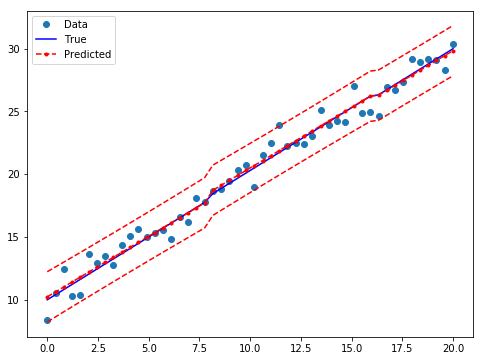

In [157]:
prstd, iv_l, iv_u = wls_prediction_std(res3)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res3.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [174]:
#共線性(Multicollinearity)
#變數間的共線性問題，不處理的話，會影響模型準確度的穩定性

#longley資料集有明顯的共線性問題
from statsmodels.datasets.longley import load_pandas

y=load_pandas().endog
X=load_pandas().exog
X=sm.add_constant(X)

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [177]:
print('y的大小',y.shape)
print('X的大小',X.shape)
print('y[1]',y[1])
print('X前5筆資料',X.head(5))

y的大小 (16,)
X的大小 (16, 7)
y[1] 61122.0
X前5筆資料    const  GNPDEFL       GNP   UNEMP   ARMED       POP    YEAR
0    1.0     83.0  234289.0  2356.0  1590.0  107608.0  1947.0
1    1.0     88.5  259426.0  2325.0  1456.0  108632.0  1948.0
2    1.0     88.2  258054.0  3682.0  1616.0  109773.0  1949.0
3    1.0     89.5  284599.0  3351.0  1650.0  110929.0  1950.0
4    1.0     96.2  328975.0  2099.0  3099.0  112075.0  1951.0


In [178]:
#fit
ols_model=sm.OLS(y,X)
ols_results=ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           4.98e-10
Time:                        13:06:21   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [197]:
#10 as the maximum level of VIF (Hair et al., 1995)
#https://faculty.fuqua.duke.edu/~mela/bio/papers/Mela_Kopalle_2002.pdf
#5 as the maximum level of VIF (Ringle et al., 2015)
#https://www.researchgate.net/publication/264934704_A_New_Criterion_for_Assessing_Discriminant_Validity_in_Variance-based_Structural_Equation_Modeling

vif.round(1)

,VIF Factor,features
0,136497961.9,const
1,135.5,GNPDEFL
2,1788.5,GNP
3,33.6,UNEMP
4,3.6,ARMED
5,399.2,POP
6,759.0,YEAR
